In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,silhouette_score,calinski_harabasz_score
import seaborn as sns
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

## 1.Loading data

In [149]:
data = pd.read_csv('Datasets/wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 2.Data analysis

In [8]:
data.shape

(178, 14)

In [9]:
data.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [10]:
data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

## 3.Data preprocessing

In [60]:
data['Type'].unique()

array([1, 2, 3])

### Seperating X and y

In [150]:
X = data.drop(labels='Type',axis=1)
X.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [151]:
y = data[['Type']]
y.head()

,Type
0,1
1,1
2,1
3,1
4,1


### Standardizing X

In [152]:
std = StandardScaler()
col = X.columns
X = pd.DataFrame(std.fit_transform(X),columns=col)
X.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


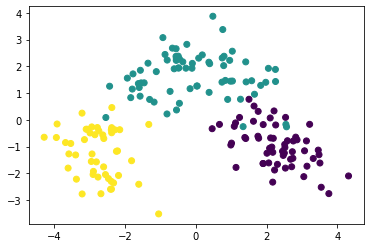

In [177]:
plt.scatter(X_transformed['X1'],X_transformed['X2'],c=data['Type'])
plt.show()

## Aplying PCA

In [111]:
from sklearn.decomposition import PCA

In [153]:
pca_decomposition = PCA(n_components=3,random_state=23)
X_transformed = pca_decomposition.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed)
X_transformed.columns = ['X1','X2','X3']
X_transformed.head()

,X1,X2,X3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [154]:
len(data.columns),len(X_transformed.columns)

(14, 3)

#### we have sucessfully decomposed ou data  from  16 dimensions to 2 dimensions

### Train test split

In [155]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.20,random_state=23,shuffle=True,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((142, 3), (36, 3), (142, 1), (36, 1))


## 5 Model building
### 5.1 Hierarical Clustering

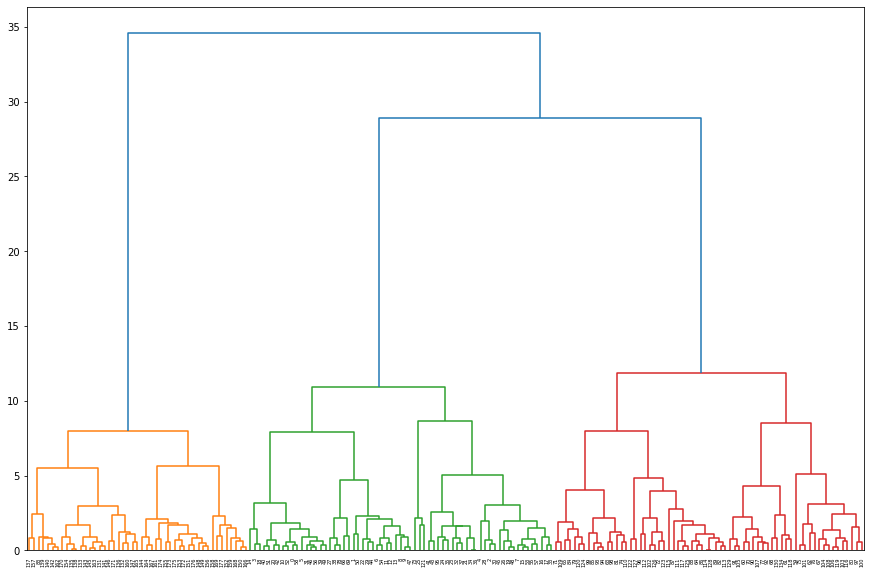

In [156]:
#cheking dendogram fro reference
plt.figure(figsize=(15,10))
linkage = sch.linkage(X_transformed,'ward')
den_graph = sch.dendrogram(linkage)

In [157]:
hierar_clustering_model =AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

### model training

In [158]:
y_hier_clust = hierar_clustering_model.fit_predict(X_transformed)

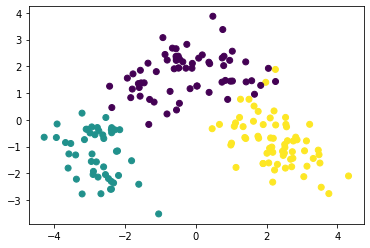

In [176]:
plt.scatter(X_transformed['X1'],X_transformed['X2'],c=y_hier_clust)
plt.show()

### 5.2 Kmeans Clustering

#### Calculating Optimum number of clusters K

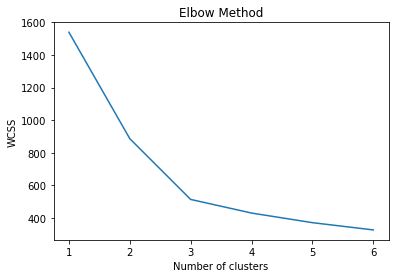

In [159]:
## Elbow Curve
wcss = []
for i in range(1, 7):
    k_means = KMeans(n_clusters=i,random_state=12)
    k_means.fit(X_transformed)
    wcss.append(k_means.inertia_)
    
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### Elbow curve suggests that the optimum value of K is 3

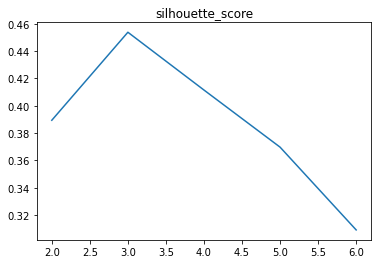

In [160]:
#using silhouette coeff
range_n_clusters = [2,3,4,5,6]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    k_means = KMeans(n_clusters=num_clusters)
    k_means.fit(X_transformed)
    cluster_labels = k_means.labels_
    silhouette_avg.append(silhouette_score(X_transformed, cluster_labels))
    
 
 # silhouette score

plt.plot(range_n_clusters,silhouette_avg) 
plt.title('silhouette_score')
plt.show()


### Shihouette score for K=3 is highest, so that is the optimum value of K

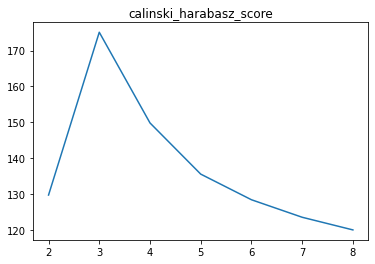

In [161]:
# using calinski_harabasz coeff

cal_score = []
range_n_clusters = [2,3,4,5,6,7,8]
for i in range_n_clusters:
    k_means = KMeans(n_clusters=i, random_state=1).fit(X_transformed)
    labels = k_means.labels_
    cal_score.append(calinski_harabasz_score(X_transformed, labels))
    
plt.plot(range_n_clusters,cal_score)
plt.title('calinski_harabasz_score')
plt.show()


#### calinski_harabasz_score for k=3 is highest so that is the optimum value of K

### Kmeans Model Building with 3 Clusters

In [178]:
k_means_model = KMeans(n_clusters=3)
y_km_clust_id = k_means_model.fit_predict(X_transformed)

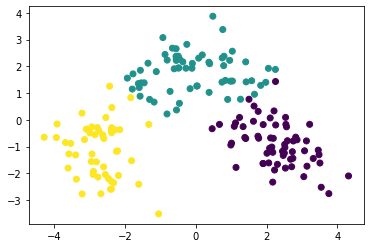

In [179]:
plt.scatter(X_transformed['X1'],X_transformed['X2'],c=y_km_clust_id)
plt.show()

## Without PCA lets check the optimum number of K

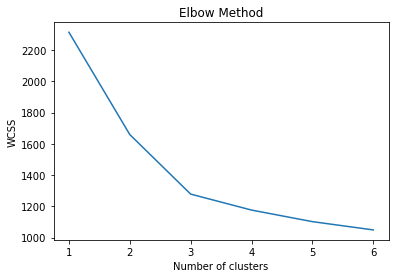

In [163]:
## Elbow Curve
wcss = []
for i in range(1, 7):
    k_means = KMeans(n_clusters=i,random_state=12)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
    
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### Optimum value of K is the value of K for which the WCSS is minimum ad there is no further significant decrease. i.e K=3

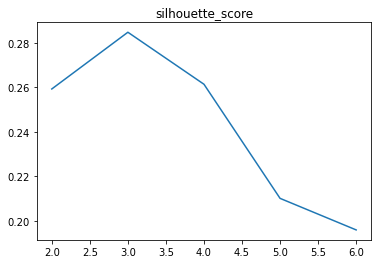

In [164]:
#using silhouette coeff
range_n_clusters = [2,3,4,5,6]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    k_means = KMeans(n_clusters=num_clusters)
    k_means.fit(X)
    cluster_labels = k_means.labels_
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    
 
 # silhouette score

plt.plot(range_n_clusters,silhouette_avg) 
plt.title('silhouette_score')
plt.show()


### The optimum value of K suggested by Silhouette_score is the value of K for which Silhouette_score is maximum. i.e K=3

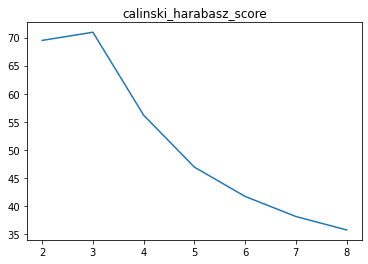

In [165]:
# using calinski_harabasz coeff

cal_score = []
range_n_clusters = [2,3,4,5,6,7,8]
for i in range_n_clusters:
    k_means = KMeans(n_clusters=i, random_state=1).fit(X)
    labels = k_means.labels_
    cal_score.append(calinski_harabasz_score(X, labels))
    
plt.plot(range_n_clusters,cal_score)
plt.title('calinski_harabasz_score')
plt.show()


### The optimum value of K suggested by calinski_harabasz_score is the value of K for which calinski_harabasz_score is maximum. i.e K=3
